In [1]:
import pandas as pd
from typing import Dict, List

In [2]:
CAPTIONS_PATH = "meme_database"

In [3]:
def read_categories():
    with open(f"{CAPTIONS_PATH}/categories.txt", "r") as f:
        categories = [line.strip() for line in f]
    return categories

categories = read_categories()

In [4]:
def read_category_memes(category_name: str) -> pd.DataFrame:
    file_name = f"{CAPTIONS_PATH}/{category_name}.json"
    return pd.read_json(file_name, lines="series")

meme_db = {
    category_name: read_category_memes(category_name)
    for category_name in categories
}

In [5]:
meme_count = {
    category_name: len(memes)
    for category_name, memes in meme_db.items()
}

print(f"Total count: {sum(x for x in meme_count.values())}")

Total count: 41127


In [6]:
two_buttons = pd.read_json("meme_database/Two-Buttons.json", lines="series")

In [7]:
print(two_buttons.info())
two_buttons.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
id         2021 non-null object
caption    2021 non-null object
dtypes: object(2)
memory usage: 31.7+ KB
None


id                                            caption
0  3dwvg7                     play fortnight; play minecraft
1  2sga2r  2000+ PEOPLE IN FRONT OF YOU; IS THIS STILL LA...
2  33891a                               other button; button
3  2ougwj                       certain death; certain death
4  3akmdc  receive $1,000,000 dollars illegally; receive ...

In [8]:
two_buttons.drop_duplicates()

id                                            caption
0     3dwvg7                     play fortnight; play minecraft
1     2sga2r  2000+ PEOPLE IN FRONT OF YOU; IS THIS STILL LA...
2     33891a                               other button; button
3     2ougwj                       certain death; certain death
4     3akmdc  receive $1,000,000 dollars illegally; receive ...
...      ...                                                ...
2016  2sk3rj                                       or miss; Hit
2017  2po0g0                           Become a furry; Meet God
2018  2qh8hk                   BAN DANK MEMES; end world hunger
2019  2szn75  Watch a tree grow; Watch the super bowl halfti...
2020  3fl01b            Remaking Skyrim; Making Elder Scrolls 6

[2021 rows x 2 columns]

In [10]:
import operator
import re
from functools import reduce
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

english_stopwords = set(stopwords.words('english'))

def sanitize_caption(caption: str) -> str:
    """
    Make caption lowercase, remove non-alphabetical characters.
    """
    caption = caption.lower()
    # Remove punctuation, but not apostrophes
    return re.sub(r"[^\w\s\d]", "", caption)


def gather_vocabulary(captions: Dict[str, pd.DataFrame]) -> List[str]:
    """
    Gather words in their basic grammatical form.
    """
    vocabulary = {}
    stemmer = PorterStemmer()
    
    for category_name, category_memes in captions.items():
        captions = category_memes["caption"].tolist()
        # Make words lowercase, remove punctuation
        sanitized_captions = map(sanitize_caption, captions)
        # Separate words from the caption and flatten all the words into a single list
        tokenized_captions = [word_tokenize(caption) for caption in sanitized_captions if len(caption)]
        tokenized_captions = reduce(operator.iconcat, tokenized_captions, [])
        # Remove stopwords
        meaningful_words = filter(lambda word: word not in english_stopwords, tokenized_captions)
        # Stem words
        vocabulary[category_name] = [stemmer.stem(word) for word in meaningful_words]

    return vocabulary

In [11]:
vocab = gather_vocabulary(meme_db)

In [12]:
from collections import Counter
from nltk.corpus import stopwords


top_words = {}
for category, cat_vocab in vocab.items():
    # Remove stop words
    top_words[category] = Counter(cat_vocab).most_common(10)

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

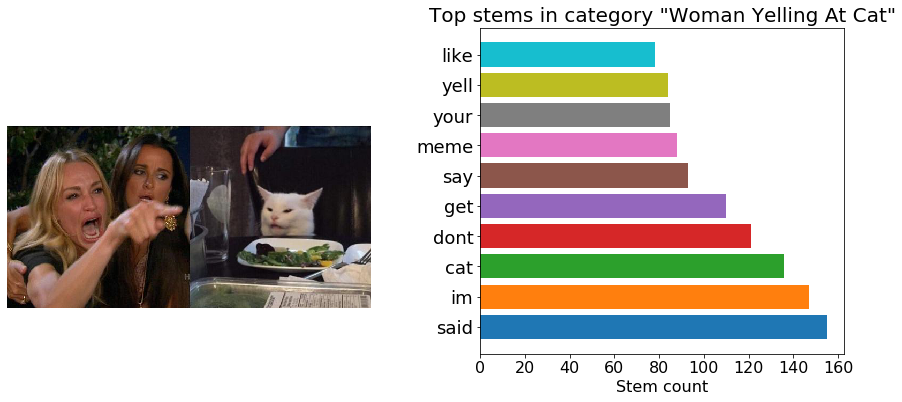

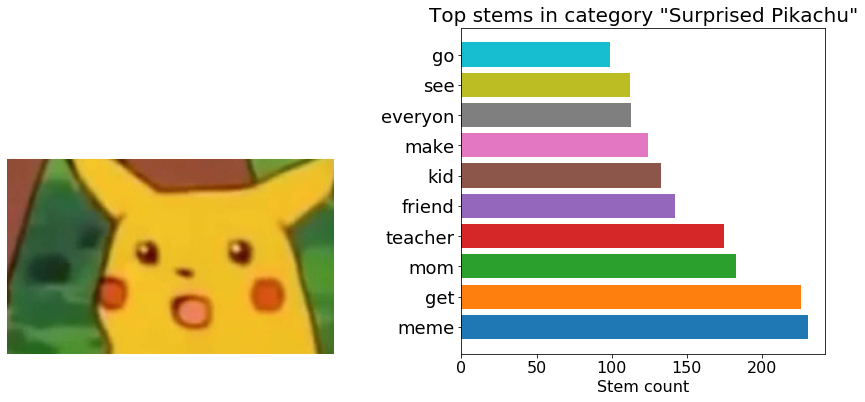

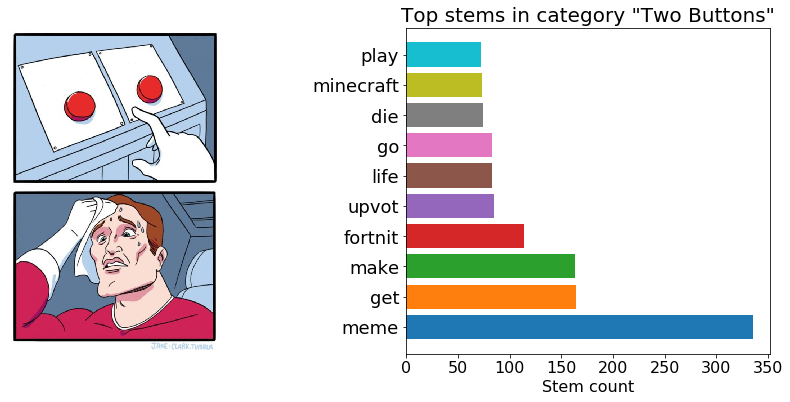

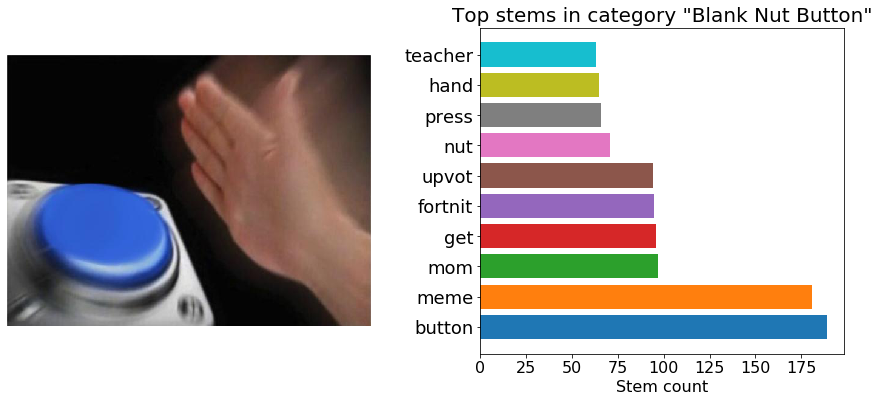

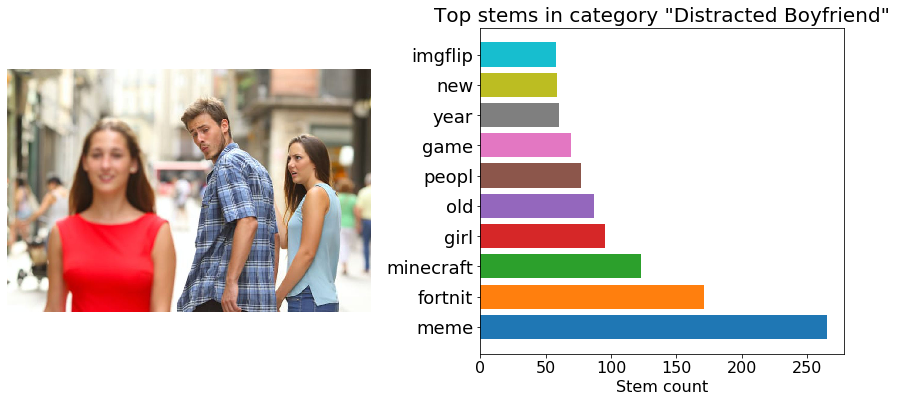

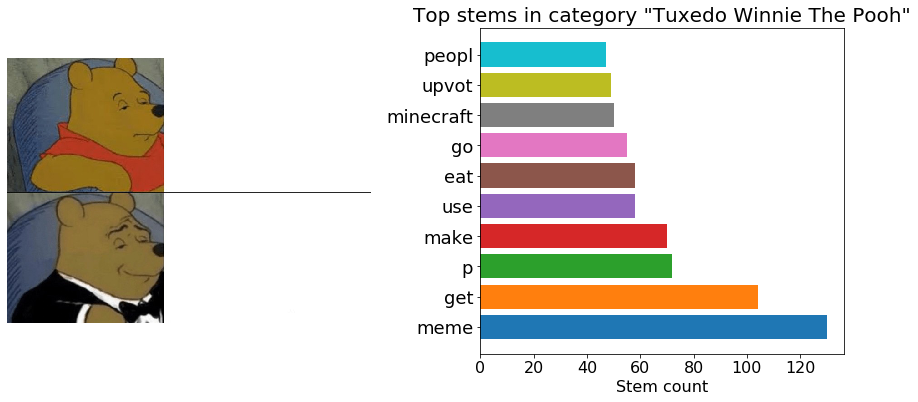

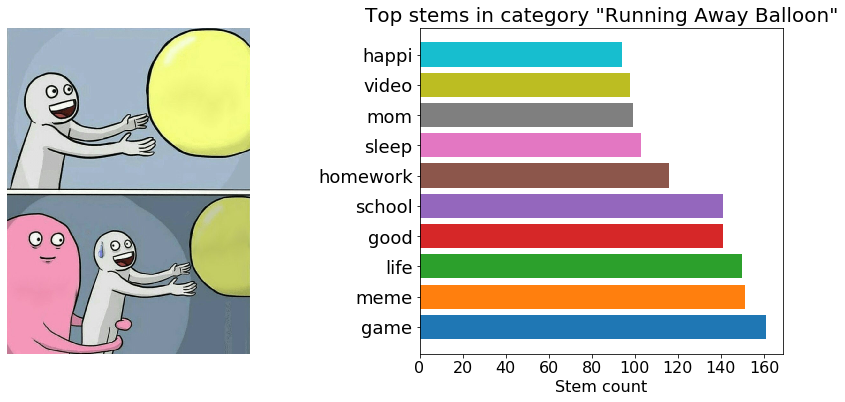

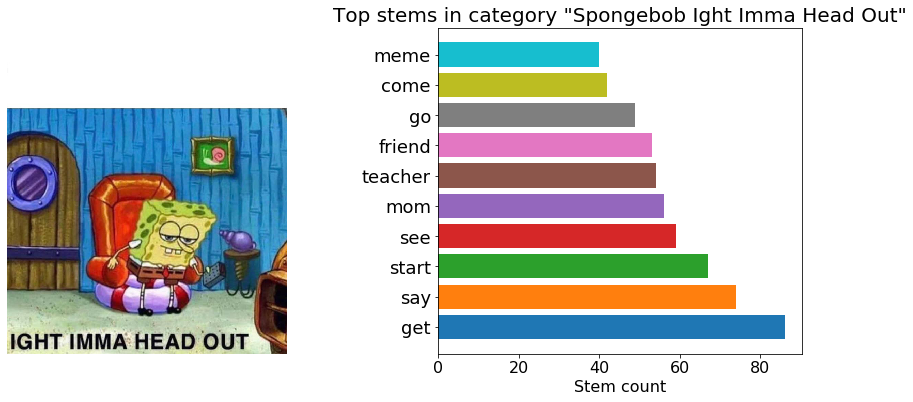

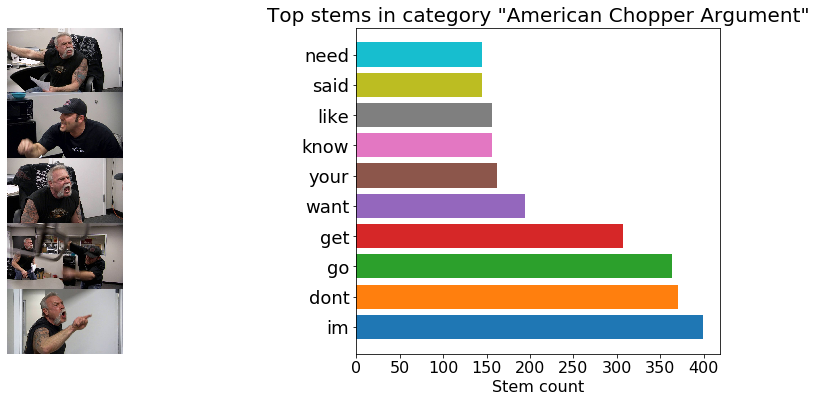

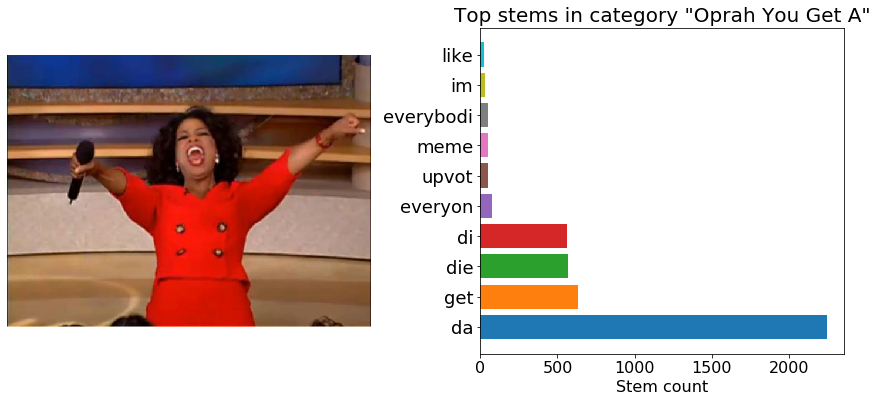

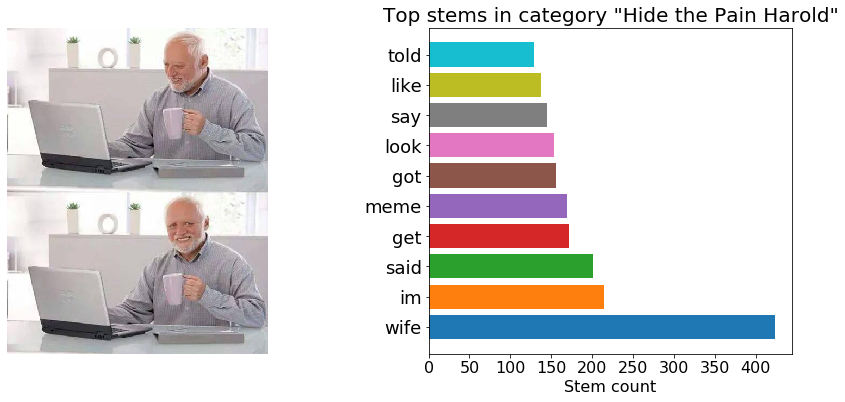

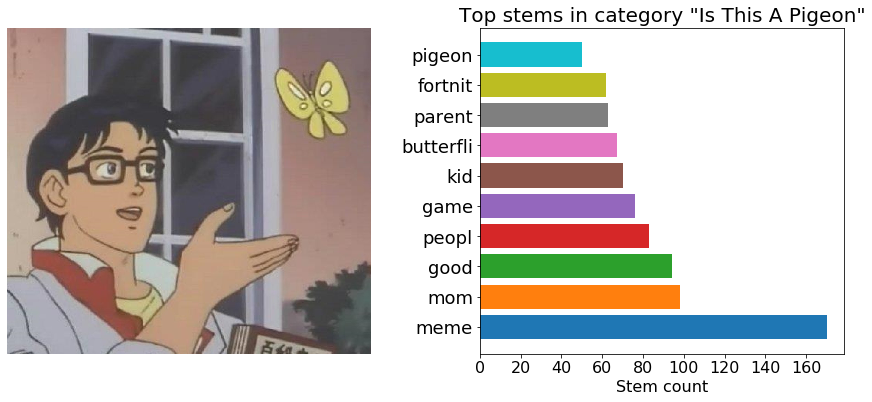

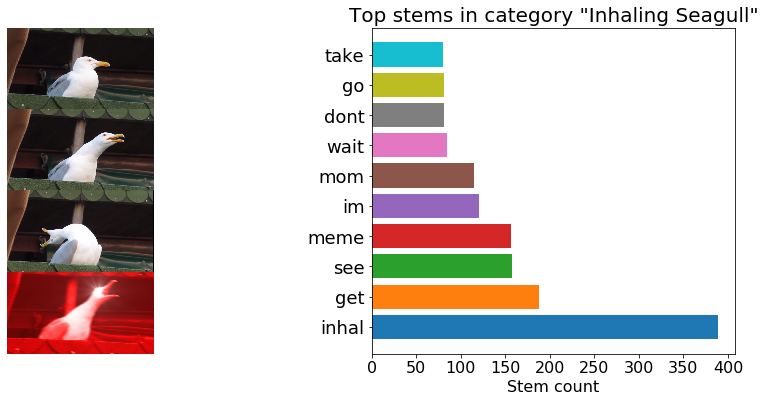

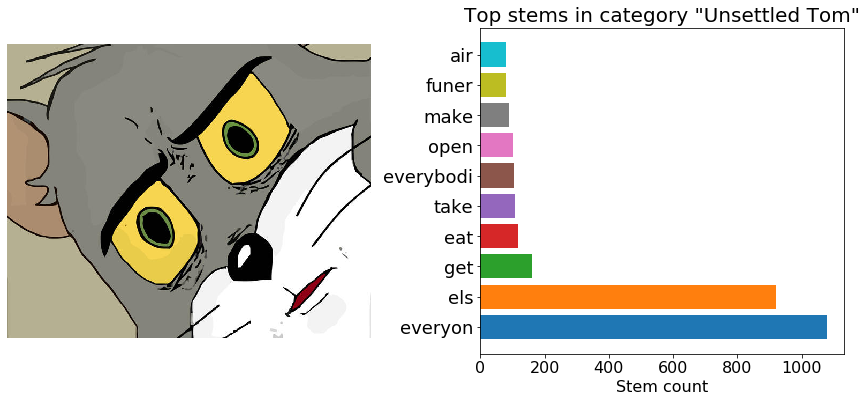

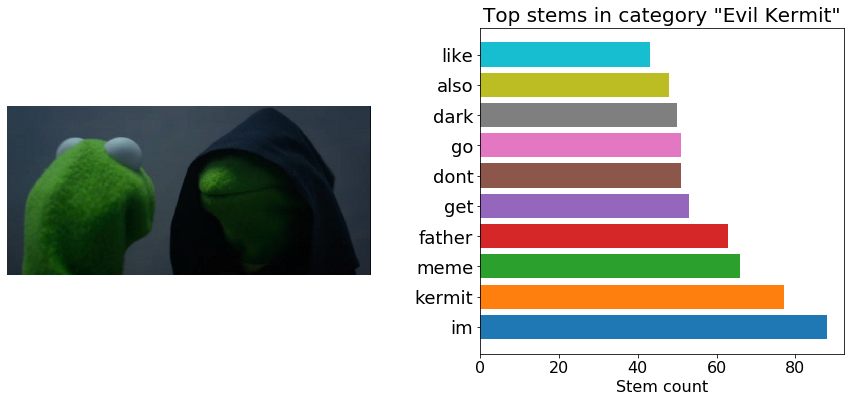

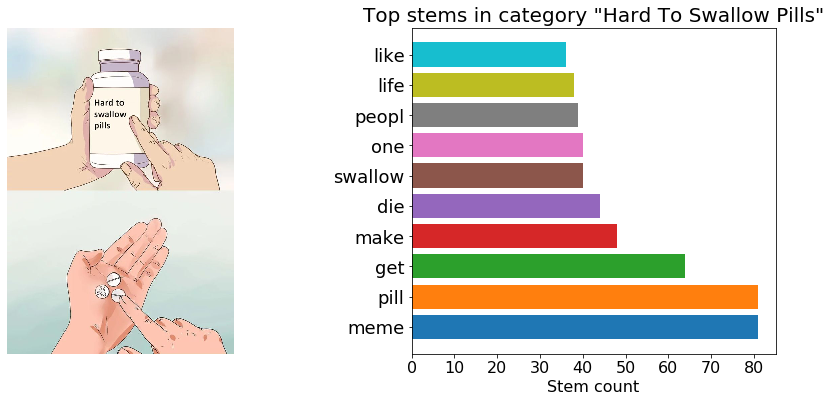

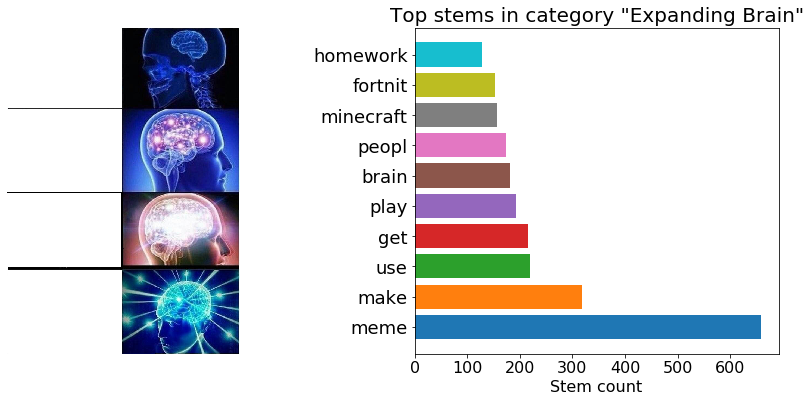

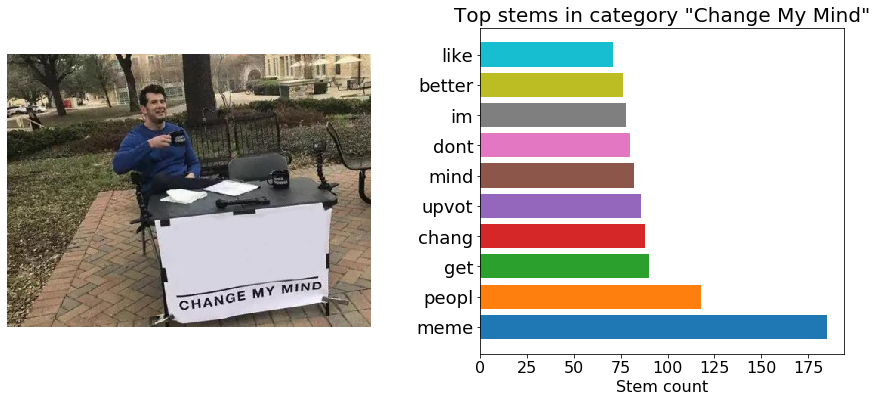

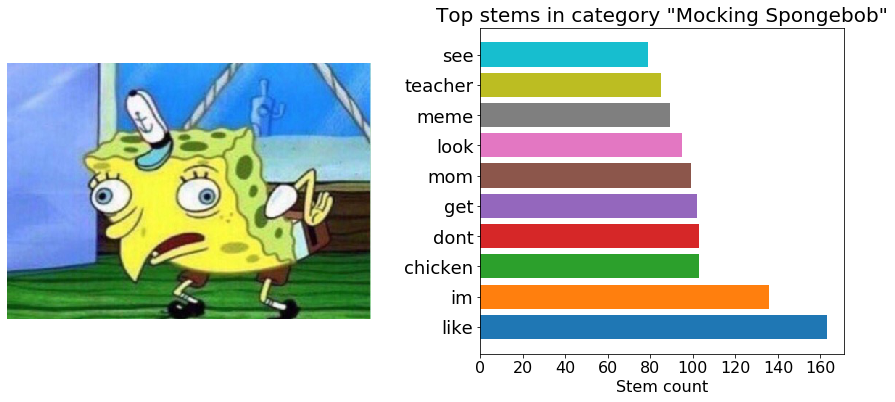

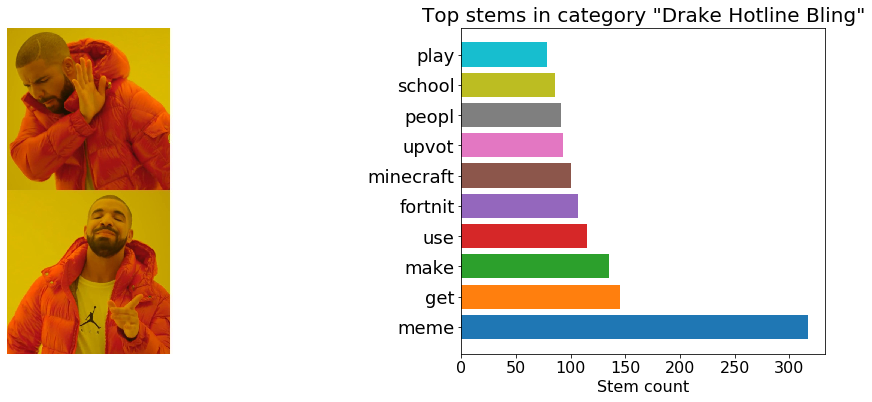

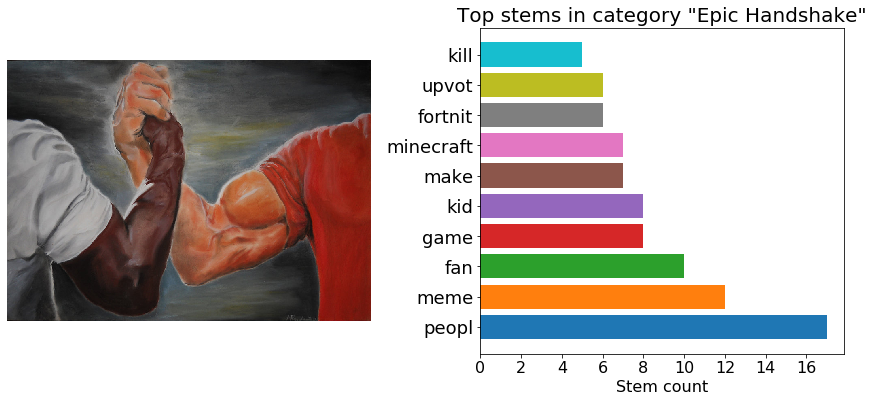

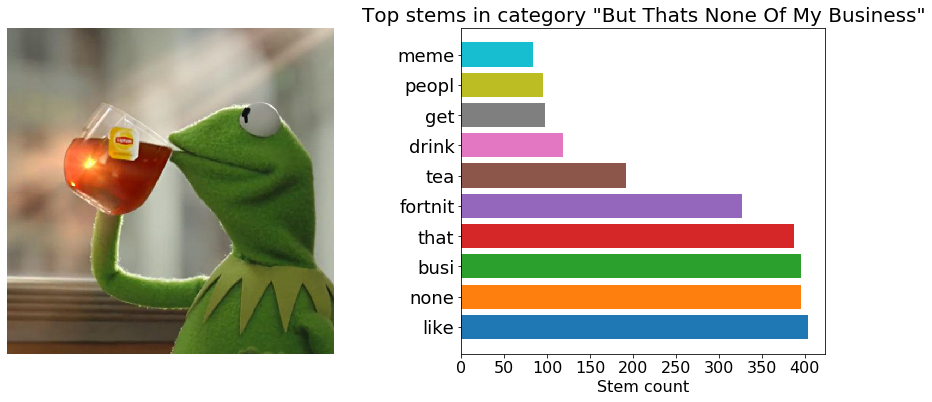

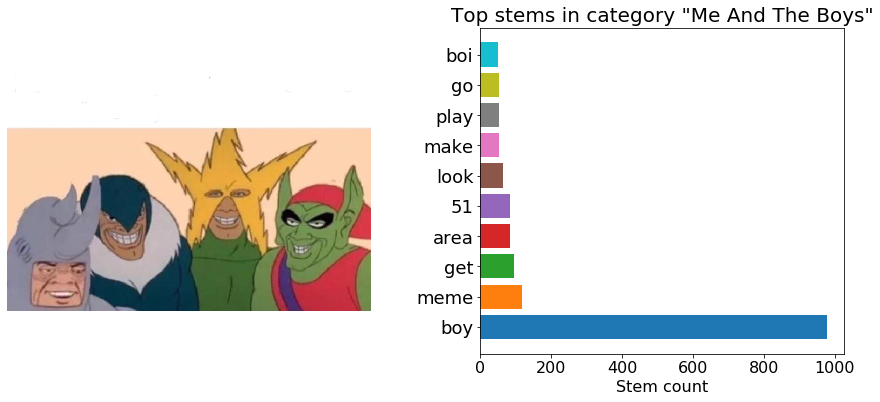

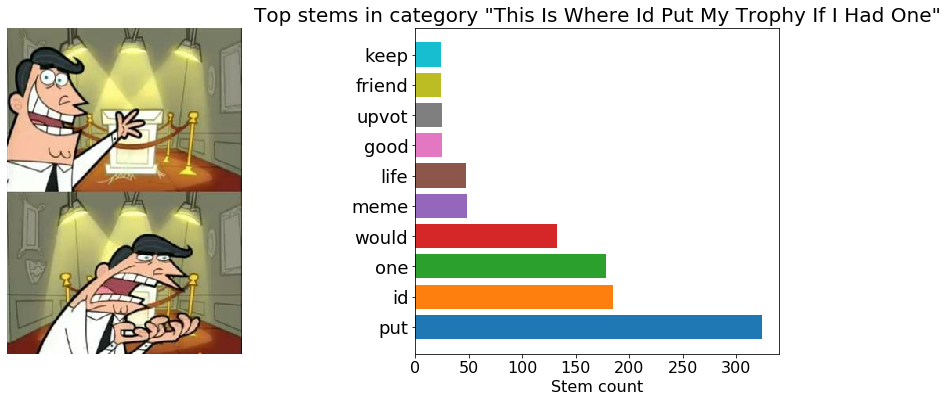

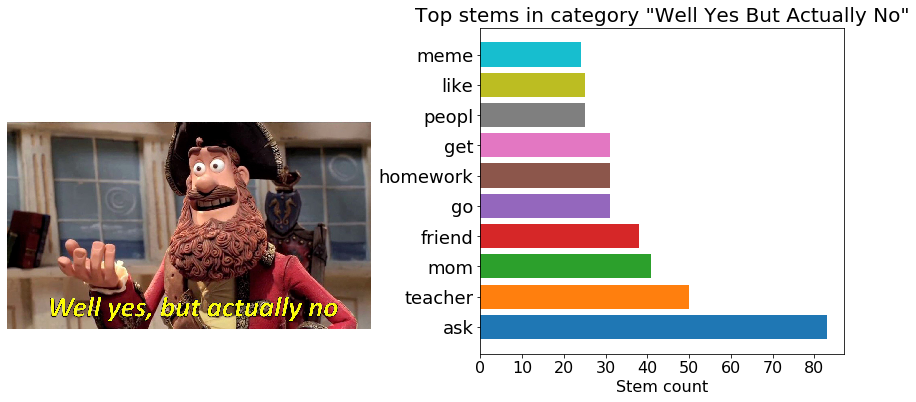

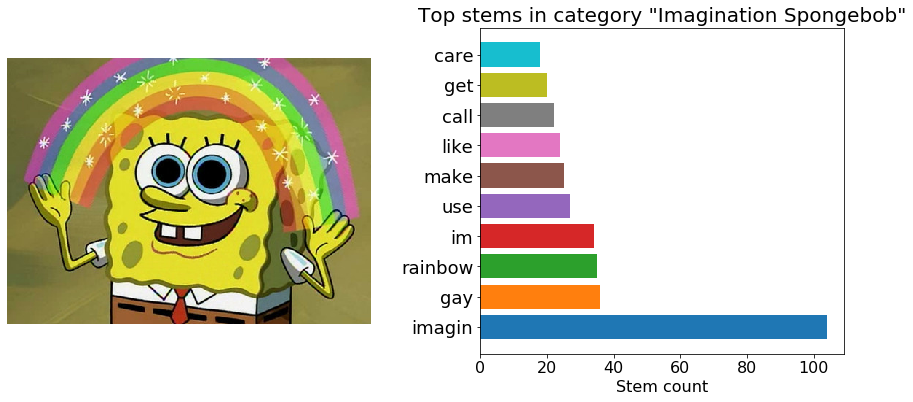

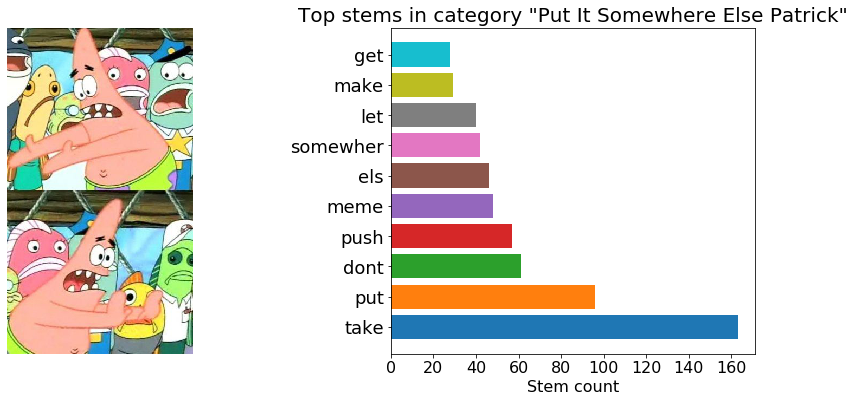

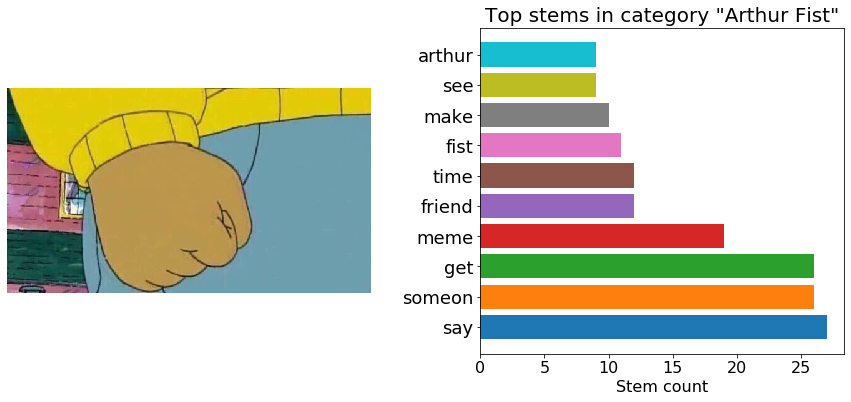

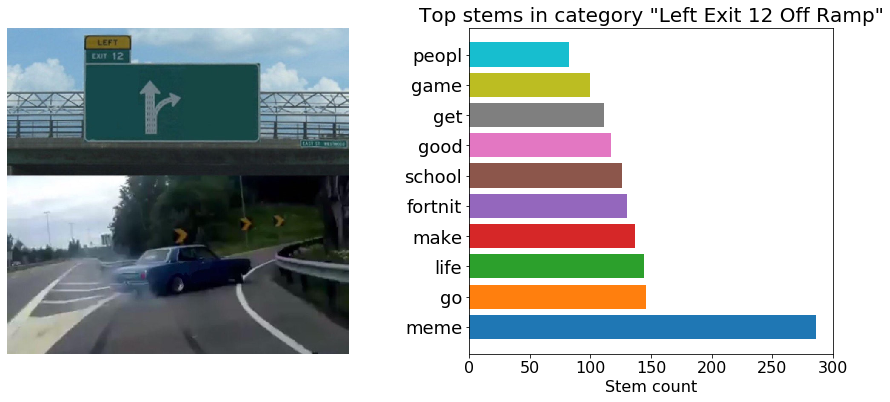

In [15]:
for category, top_cat_words in top_words.items():
    fig = plt.figure(figsize=(15, 6))
    plt.subplots_adjust(wspace=0.3)

    # Plot meme template
    fig.add_subplot(1, 2, 1)
    
    template = mpimg.imread(f"meme_database/templates/{category}.jpg")
    plt.imshow(template)
    plt.axis('off')
    
    # Plot top results
    fig.add_subplot(1, 2, 2)
    for word, count in top_cat_words:
        plt.barh(word, count)
    
    plt.title(f'Top stems in category "{category.replace("-", " ")}"', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=18)
    plt.xlabel("Stem count", fontsize=16)
    plt.show()

# Preparing for training

Based on [PyTorch tutorial](https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html).

## Caption library

Create a dictionary with captions, all in lowercase, without non-ASCII characters.

In [39]:
import unicodedata
from string import ascii_letters


def unicode_to_ascii(caption: str) -> str:
    """
    Convert Unicode string to ASCII characters only.
    
    Source: https://stackoverflow.com/a/518232/2809427
    """
    return "".join(
        char for char in unicodedata.normalize("NFD", caption)
        if unicodedata.category(char) != "Mn"
    )

In [51]:
from typing import Dict, List

def create_caption_collection(captions: Dict[str, pd.DataFrame]) -> Dict[str, List[str]]:
    """
    Makes a dictionary of all captions within the categories.
    Turns the original caption lowercase and converts it to ASCII.
    """
    return {
        category_name: list(
            map(
                lambda caption: unicode_to_ascii(caption.lower()), 
                category_memes["caption"].tolist()
            )
        )
        
        for category_name, category_memes in captions.items()
    }

captions_db = create_caption_collection(meme_db)
print(captions_db["Woman-Yelling-At-Cat"][3])

central: "operator 101, safely and efficiently you're falling behind, over!"; "101 requesting a personal...over"


In [42]:
set("fdsfdfsafsd")

{'a', 'd', 'f', 's'}

In [45]:
from functools import reduce

# Create an alphabet of characters used in the captions
alphabet = set()

for category_captions in captions_db.values():
    captions_alphabets = [set(caption) for caption in category_captions]
    category_alphabet = reduce(lambda a, b: a.union(b), captions_alphabets)
    alphabet = alphabet.union(category_alphabet)
    
    
print(f"Alphabet of {len(alphabet)} characters:")
print(alphabet)

Alphabet of 498 characters:
{'¨', '⎓', 'v', 'ɗ', '🤣', 'র', 'ǝ', 'ণ', 'ড', '！', '🏽', '😠', '🤷', '@', 'н', '斯', '…', '有', 'ɇ', 'з', 'i', '┼', '娶', '👎', '包', 'ᴀ', 'ᴇ', 'ᒷ', 'w', '\xa0', '又', '⌣', '🐐', '🙇', '🗡', 'श', '🚾', 'ী', '•', '☕', 'ʜ', '🇧', '🥒', 'ø', 'ث', '👊', '🌕', '”', '÷', '🎄', 'κ', 'त', '😋', '拉', 'q', '∏', '😒', '👍', 'ন', '💕', 'a', ' ', 'ʘ', '🐸', '圖', '➡', '☢', '♠', '母', '👿', '做', 'আ', 'а', '把', '៣', '巴', '😥', 'ɲ', 'ា', '«', 'ᵯ', 'е', 'д', 'ᵇ', '🎶', '¶', '/', '‘', '£', '♀', '9', 'ŧ', '🗿', '𝓽', '红', 'ロ', 'ة', '𝙹', '🅿', 'ˋ', '🐇', '}', 'ᓭ', 'л', '២', '╡', 'c', 'k', '3', '🤬', 'ល', 'ង', '–', 'ᴛ', '？', 'ˇ', 'π', '𝓻', '🐔', '👀', 'ɪ', '🍅', '*', '[', '☭', '⛎', 'ه', 'z', '🤪', 'ت', 'ν', 'α', 'ش', '🥶', ';', 'y', 'ɥ', '𝓪', '🤯', '|', '€', '🆘', '😃', 'ς', '🤩', '❣', 'গ', '†', '♂', 'и', '¡', '😀', '🇮', 'ρ', '🔄', 'м', '☆', '準', '³', '🅱', '↘', '0', 'j', '1', '◔', '~', '∞', '😭', '↓', 'ф', '🤓', 'द', '<', '💯', '么', '´', '︶', 'រ', '🍆', '🇱', '特', "'", 'ي', '„', '⅓', 'ƈ', '🏾', '☠', 'г', 'ញ', 'ا', '𝓷', '🇷', '😎'

In [ ]:
# Remove all non-standard characters :c

In [174]:
from typing import Dict, List

import unicodedata
from string import ascii_letters, digits

allowed_alphabet = ascii_letters + " .,;'-" + digits


MIN_CAPTION_LENGTH = 5

def normalize_caption(caption: str) -> str:
    """
    Convert Unicode string to ASCII characters only.
    
    Source: https://stackoverflow.com/a/518232/2809427
    """
    def char_to_ascii(char: str) -> str:
        """
        """
        normalized = unicodedata.normalize("NFD", char)
        if normalized in allowed_alphabet:
            return normalized
        else:
            return ""
            
        
    return "".join(map(char_to_ascii, caption))


def create_caption_collection(captions: Dict[str, pd.DataFrame]) -> Dict[str, List[str]]:
    """
    Makes a dictionary of all captions within the categories.
    Turns the original caption lowercase and converts it to ASCII.
    """
    db = {}
    for category_name, category_memes in captions.items():
        captions = map(
                lambda caption: normalize_caption(caption.lower()) + "\n", 
                category_memes["caption"].tolist()
            )
        
        # Filter out captions of length smaller than MIN_CAPTION_LENGTH
        captions = list(
            filter(
                lambda caption: len(caption) >= MIN_CAPTION_LENGTH,
                captions
            )
        )
        
        db[category_name] = captions
    
    return db

captions_db = create_caption_collection(meme_db)
print("\n".join(captions_db["Woman-Yelling-At-Cat"][:10]))

john smith making argument to eat children to survive; the children

my gf yelling at me; me wondering why the dishwasher is yelling

i want the truth you can't handle the truth

central operator 101, safely and efficiently you're falling behind, over; 101 requesting a personal...over

tooth; toof

loki fans after endgame; tony stark fans after endgame

its stuffing, not dressing who the hell cares, just eat it.

i said i want a hotdog chill....go to gilchrist park..its a hotdog day

ok question, what was the funniest thing that happened in truth or dare comment below; i'll go first... don't worry about nsfw

why aren't you eating your vegetables; i'd rather eat a clam



In [175]:
# Create an alphabet of characters used in the captions
alphabet = set()

for category_captions in captions_db.values():
    captions_alphabets = [set(caption) for caption in category_captions]
    category_alphabet = reduce(lambda a, b: a.union(b), captions_alphabets)
    alphabet = alphabet.union(category_alphabet)
    
alphabet = "".join(sorted(alphabet))
print(f"Alphabet of {len(alphabet)} characters:")
print(alphabet)

Alphabet of 43 characters:

 ',-.0123456789;abcdefghijklmnopqrstuvwxyz


In [132]:
n_letters = len(alphabet) + 1 # Plus EOS marker

## Helper functions for feeding the model during training

In [176]:
from random import choice
from typing import Tuple


def get_random_training_pair() -> Tuple[str, str]:
    """
    Draws a random category and a caption from that meme category.
    """
    category = choice(categories)
    caption = choice(captions_db[category])
    return (category, caption)

In [177]:
get_random_training_pair()

('Put-It-Somewhere-Else-Patrick',
 'not sleeping all night; sleeping all night\n')

In [178]:
import torch
from torch import nn

In [179]:
n_categories = len(categories)


def encode_category_name(category: str) -> torch.tensor:
    """
    Use one-hot encoding for categories.
    """
    encoded_category = torch.zeros(1, n_categories)
    cat_ind = categories.index(category)
    encoded_category[0][cat_ind] = 1
    return encoded_category

    
print(f"Woman-Yelling-At-Cat -> {encode_category_name('Woman-Yelling-At-Cat')}")

Woman-Yelling-At-Cat -> tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [180]:
def create_input_tensor(caption: str) -> torch.tensor:
    """
    One-hot matrix of first to last letters (not including EOS) for the caption.
    """
    caption_tensor = torch.zeros(len(caption), 1, n_letters)
    for i, letter in enumerate(caption):
        caption_tensor[i][0][alphabet.index(letter)] = 1
    return caption_tensor


create_input_tensor(captions_db["Woman-Yelling-At-Cat"][0])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.]]])

In [181]:
def create_target_tensor(caption: str) -> torch.tensor:
    """
    LongTensor of second letter to end (EOS) for the target.
    """
    letter_indices = [alphabet.index(letter) for letter in caption]
    letter_indices.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indices)

create_target_tensor(captions_db["Woman-Yelling-At-Cat"][0])

tensor([26, 31, 24, 30,  1, 35, 29, 25, 36, 24,  1, 29, 17, 27, 25, 30, 23,  1,
        17, 34, 23, 37, 29, 21, 30, 36,  1, 36, 31,  1, 21, 17, 36,  1, 19, 24,
        25, 28, 20, 34, 21, 30,  1, 36, 31,  1, 35, 37, 34, 38, 25, 38, 21, 16,
         1, 36, 24, 21,  1, 19, 24, 25, 28, 20, 34, 21, 30,  0, 42])

In [182]:
def get_random_training_example() -> Tuple[torch.tensor, torch.tensor, torch.tensor]:
    """
    Returns a category, input and target tensors from a random pair of
    a meme category and its caption.
    
    :return: A triple of:
    - one-hot encoded category name (one dimensional tensor)
    - one-hot encoded matrix of the input caption
    - target tensor
    """
    category, caption = get_random_training_pair()
    category_tensor = encode_category_name(category)
    input_caption_tensor = create_input_tensor(caption)
    target_caption_tensor = create_target_tensor(caption)
    
    return category_tensor, input_caption_tensor, target_caption_tensor

In [183]:
get_random_training_example()

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[1., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([34, 21, 17, 28,  1, 21, 41, 21, 35,  1,  4,  1, 34, 21, 17, 28,  1, 28,
         25, 21, 35,  1,  4,  1, 34, 21, 17, 28, 25, 42, 21, 16,  1, 25,  2, 29,
          1, 17,  1, 32, 17, 34, 17, 20, 25, 23, 29, 17, 36, 25, 19,  1, 35, 28,
         17, 38, 21,  0, 42]))

# Create an RNN

In [184]:
import time
import math

def get_time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [185]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.3)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input_caption, hidden):
        input_combined = torch.cat((category, input_caption, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [187]:
rnn = RNN(n_letters, 516, n_letters)

criterion = nn.NLLLoss()

learning_rate = 1e-4

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.init_hidden()

    rnn.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item() / input_line_tensor.size(0)


n_epochs = 1000
print_every = n_epochs / 100
plot_every = 100
all_losses = []
total_loss = 0 # Reset every plot_every iters

start = time.time()

for epoch in range(1, n_epochs + 1):
    output, loss = train(*get_random_training_example())
    total_loss += loss

    if epoch % print_every == 0:
        print('%s (%d %d%%) %.4f' % (get_time_since(start), epoch, epoch / n_epochs * 100, loss))

    if epoch % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 0s (10 1%) 3.7687
0m 2s (20 2%) 3.7431
0m 2s (30 3%) 3.7364
0m 3s (40 4%) 3.7333
0m 4s (50 5%) 3.7397
0m 4s (60 6%) 3.7228
0m 6s (70 7%) 3.6899
0m 6s (80 8%) 3.6912
0m 7s (90 9%) 3.6679
0m 8s (100 10%) 3.7021
0m 9s (110 11%) 3.6694
0m 9s (120 12%) 3.6636
0m 10s (130 13%) 3.6883
0m 11s (140 14%) 3.6009
0m 11s (150 15%) 3.6546
0m 12s (160 16%) 3.6609
0m 12s (170 17%) 3.6192
0m 13s (180 18%) 3.6570
0m 14s (190 19%) 3.5748
0m 15s (200 20%) 3.5808
0m 15s (210 21%) 3.6208
0m 16s (220 22%) 3.5704
0m 17s (230 23%) 3.5170
0m 17s (240 24%) 3.4981
0m 18s (250 25%) 3.5488
0m 18s (260 26%) 3.4422
0m 19s (270 27%) 3.4607
0m 21s (280 28%) 3.5494
0m 23s (290 28%) 3.4840
0m 26s (300 30%) 3.5833
0m 27s (310 31%) 3.3424
0m 29s (320 32%) 3.1761
0m 32s (330 33%) 3.3105
0m 35s (340 34%) 3.7296
0m 36s (350 35%) 3.3258
0m 36s (360 36%) 3.1872
0m 37s (370 37%) 3.2959
0m 38s (380 38%) 3.3207
0m 38s (390 39%) 3.4591
0m 39s (400 40%) 3.2074
0m 40s (410 41%) 3.1403
0m 41s (420 42%) 3.2340
0m 41s (430 43%) 3.542

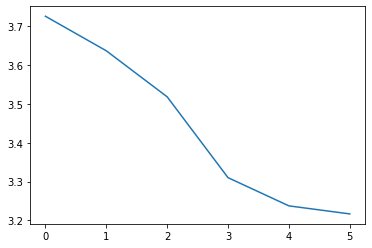

In [188]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [189]:
max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = encode_category(category)
        input_tensor = create_input_tensor(start_letter)
        hidden = rnn.init_hidden()

        output_caption = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input_tensor[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = alphabet[topi]
                output_caption += letter
            input_tensor = create_input_tensor(letter)

        return output_caption

    
# Get multiple samples from one category and multiple starting letters
def samples(category, num_examples=5):
    for _ in range(num_examples):
        start_letter = choice(alphabet)
        print(sample(category, start_letter))

        
for category in categories:
    print(f"Category: {category}")
    samples(category)
    print()

Category: Woman-Yelling-At-Cat
pmmmmmmmmmmmmmmmmmmmm
rmmmmmmmmmmmmmmmmmmmm
bmmmmmmmmmmmmmmmmmmmm
2mmmmmmmmmmmmmmmmmmmm
.mmmmmmmmmmmmmmmmmmmm

Category: Surprised-Pikachu
bmmmmmmmmmmmmmmmmmmmm
jmmmmmmmmmmmmmmmmmmmm
 mmmmmmmmmmmmmmmmmmmm
,mmmmmmmmmmmmmmmmmmmm
bmmmmmmmmmmmmmmmmmmmm

Category: Two-Buttons
0mmmmmmmmmmmmmmmmmmmm
pmmmmmmmmmmmmmmmmmmmm
hmmmmmmmmmmmmmmmmmmmm
8mmmmmmmmmmmmmmmmmmmm
2mmmmmmmmmmmmmmmmmmmm

Category: Blank-Nut-Button
5mmmmmmmmmmmmmmmmmmmm
smmmmmmmmmmmmmmmmmmmm
tmmmmmmmmmmmmmmmmmmmm
dmmmmmmmmmmmmmmmmmmmm
qmmmmmmmmmmmmmmmmmmmm

Category: Distracted-Boyfriend
cmmmmmmmmmmmmmmmmmmmm
8mmmmmmmmmmmmmmmmmmmm
7mmmmmmmmmmmmmmmmmmmm
ummmmmmmmmmmmmmmmmmmm
rmmmmmmmmmmmmmmmmmmmm

Category: Tuxedo-Winnie-The-Pooh
lmmmmmmmmmmmmmmmmmmmm
fmmmmmmmmmmmmmmmmmmmm
gmmmmmmmmmmmmmmmmmmmm
bmmmmmmmmmmmmmmmmmmmm
pmmmmmmmmmmmmmmmmmmmm

Category: Running-Away-Balloon
;mmmmmmmmmmmmmmmmmmmm
cmmmmmmmmmmmmmmmmmmmm
ymmmmmmmmmmmmmmmmmmmm
zmmmmmmmmmmmmmmmmmmmm
bmmmmmmmmmmmmmmmmmmmm

Category: Spongebob-

277